# **Importing dataset**

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# **Graph Representation**

In [ ]:
def heatmap(y_val,predicted_val,model_name):
  cm = confusion_matrix(y_val, predicted_val)
  plt.figure(figsize=(8,4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[' valid','  fraud'], yticklabels=[' valid','  fraud'])
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.title(model_name)
  plt.show()


def classificationReport(y_val,predicted_val):
  print(classification_report(y_val,predicted_val, target_names=['Not Fraud', 'Fraud']))

def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)

# **Dataset**

In [ ]:
df = pd.read_csv("creditcard.csv", sep = ',')
df['Amount'] = RobustScaler().fit_transform(df['Amount'].to_numpy().reshape(-1, 1))
time = df['Time']
df['Time'] = (time - time.min()) / (time.max() - time.min())
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


# **Splitting Dataset**

In [ ]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

not_frauds = df.query('Class == 0')
frauds = df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

balanced_df = pd.concat([frauds, not_frauds.sample(10*len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

balanced_df = balanced_df.sample(frac=1, random_state=1)

In [ ]:
balanced_df_np = balanced_df.to_numpy()

x_train, y_train = balanced_df_np[:4000, :-1], balanced_df_np[:4000, -1].astype(int)
x_val, y_val = balanced_df_np[4000:, :-1], balanced_df_np[4000:, -1].astype(int)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts()

(0    3644
 1     356
 Name: count, dtype: int64,
 0    1276
 1     136
 Name: count, dtype: int64)

# **Neural Network**

In [ ]:
model = Sequential([
    InputLayer(shape=(x_train.shape[1],)),
    Dense(4, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

checkpoint = ModelCheckpoint('model.keras', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, callbacks = [checkpoint, early_stopping])

Epoch 1/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9650 - loss: 0.1054 - val_accuracy: 0.9766 - val_loss: 0.0805
Epoch 2/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9758 - loss: 0.0769 - val_accuracy: 0.9780 - val_loss: 0.0791
Epoch 3/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9799 - loss: 0.0697 - val_accuracy: 0.9809 - val_loss: 0.0741
Epoch 4/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9767 - loss: 0.0823 - val_accuracy: 0.9809 - val_loss: 0.0751
Epoch 5/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9748 - loss: 0.0855 - val_accuracy: 0.9809 - val_loss: 0.0741
Epoch 6/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9812 - loss: 0.0684 - val_accuracy: 0.9816 - val_loss: 0.0726
Epoch 7/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9843 - loss: 0.0574 - val_accuracy: 0.9816 - val_loss: 0.0736
Epoch 8/40
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.0601 - val_accuracy: 0.

# **Test on original dataset**

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    284315
       Fraud       0.74      0.83      0.78       492

    accuracy                           1.00    284807
   macro avg       0.87      0.92      0.89    284807
weighted avg       1.00      1.00      1.00    284807

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


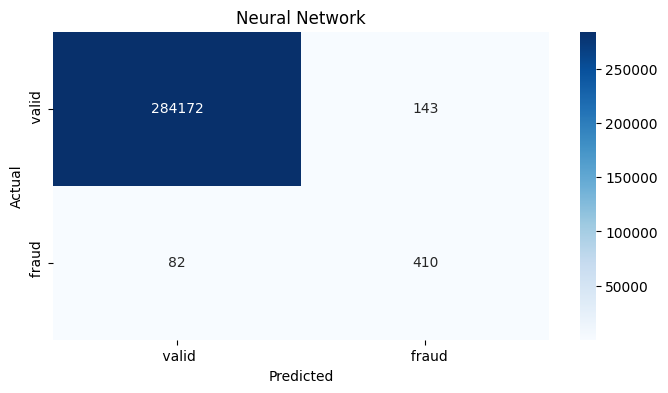

In [ ]:
classificationReport(Y, neural_net_predictions(model, X))
heatmap(Y, neural_net_predictions(model, X), "Neural Network")